### Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

#### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Name : Rabia Hashim

In [7]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,6.0)

### STEP#01: Loading Data

In [8]:

dataset=pd.read_csv('dataset.csv')
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### STEP#02: Plot The Data

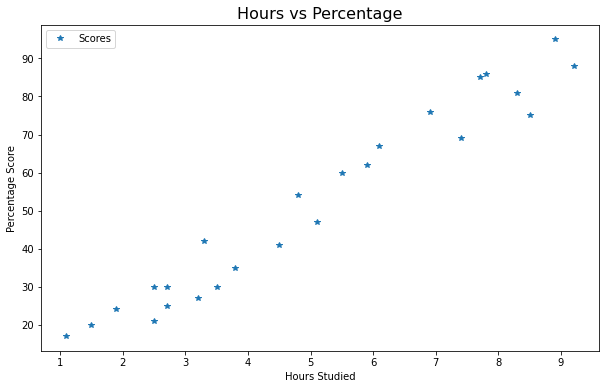

In [13]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### STEP#03 : **Build A Linear Regression Model**

 next step is to divide the dataset into "attributes" (inputs) and "labels" (outputs).

In [14]:
#Collecting x and y
x = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [15]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

### Training the Model
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [16]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


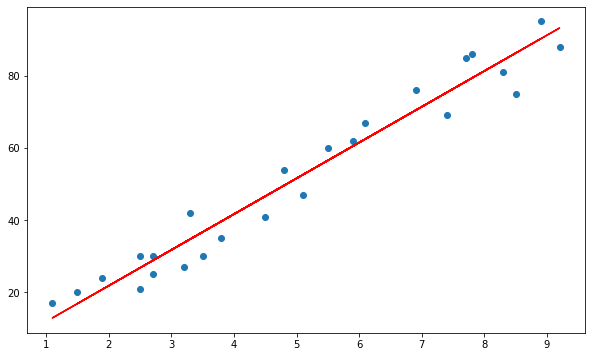

In [17]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red');
plt.show()

In [21]:
print("Weights:" , reg.coef_ )
print("Intercepts:" , reg.intercept_ )

Weights: [9.91065648]
Intercepts: 2.018160041434683


In [19]:
print("Accuracy of Training learning rate -",reg.score(x_train, y_train)*100)
print("Accuracy of Testing learning rate - ",reg.score(x_test, y_test)*100)

Accuracy of Training learning rate - 95.15510725211553
Accuracy of Testing learning rate -  94.54906892105356


### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [24]:
print(x_test) # Testing data - In Hours
y_pred = reg.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Step#04: Plot The Regression Line

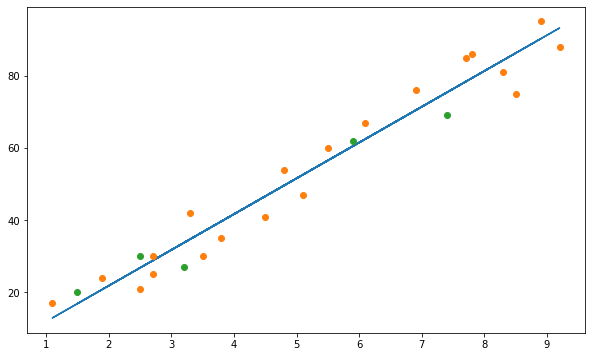

In [24]:
reg_line=reg.predict(x)
plt.plot(x,reg_line)
plt.plot(x_train,y_train,'o')
plt.plot(x_test,y_test,'o')
plt.show()


### STEP#05: Make Predictions on Test Data

In [27]:
# You can also test with your own data
hours = [[9.25]]
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### STEP#06: Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [28]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
